In [163]:
'''Помечать "*" все, что входит в EDA'''
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

## 1. Основные понятия
### 1.1. Генеральная совокупность и выборка
Создадим генеральную совокупность, распределённую нормально.

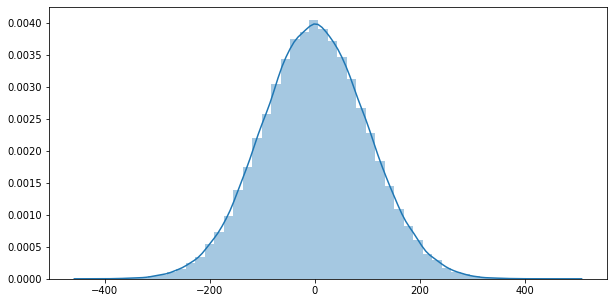

In [164]:
# кол-во объектов
n = 100000
# математическое ожидание (среднее)
n_mean = 0
# среднеквадратичное отклонение (иногда стандартное отклонение, но стандартное берет отклонения по модулю)
n_sigma = 100
# синтезируем нормальное распределение
norm_distr = np.random.normal(n_mean, n_sigma, n)
# посмотрим на получившееся распределение
fig = plt.figure(figsize=(10, 5))
sns.distplot(norm_distr, bins=50)
plt.show()

### 1.2. Меры центральной тенденции.  
**Минимум, максимум, среднее, медиана.**

In [165]:
# отсортируем по возрастанию
norm_distr_sort = np.sort(norm_distr)
# минимум
min_ = norm_distr_sort[0]
##print('Minimum =', min_)
min_ = norm_distr.min()
##print('Minimum =', min_)
# максимум
max_ = norm_distr_sort[-1]
##print('Maximum =', max_)
max_ = norm_distr.max()
##print('Maximum =', max_)
# среднее
sum_ = 0
for i in norm_distr:
    sum_ += i
mean_ = sum_ / len(norm_distr)
##print('Mean =',mean_)
sum_ = norm_distr.sum()
mean_ = sum_ / len(norm_distr)
##print('Mean =',mean_)
mean_ = norm_distr.mean()
##print('Mean =', mean_)
# медиана
if len(norm_distr_sort)%2==1:
    median_ = norm_distr_sort[int(len(norm_distr_sort)/2)]
else:
    index = int(len(norm_distr_sort)/2)
    median_ = (norm_distr_sort[index-1] + norm_distr_sort[index]) / 2
##print('Median =', median_)
median_ = np.median(norm_distr)
##print('Median =', median_)

### 1.3. Меры изменчивости.
**Размах, дисперсия, среднеквадратическое отклонение.**

In [166]:
range_ = max_ - min_
##print('Range =', range_)
# дисперсия
variance = np.mean((norm_distr - norm_distr_sort.mean())**2)
##print('Variance =', variance)
# СКО
sd = np.sqrt(variance)
##print('Standart deviation =', sd)

### 1.4. Квантили распределения.
**Количественная трактовка**: Квантили это числа выборки (популяции), слева от которых расположено кол-во наблюдений, которое они означают. Т.е. 0.25 квантиль означает, что чисел, котрые меньше этого 25% из всей выборки.

**Вероятностная трактовка**: квантили это семейство оценок, отвечающих на вопрос – какое значение случайная величины не превысит с заданной вероятностью.  
Полезно для поиска аномальных значений, выбросов. Чаще всего на практике используются квартили – квантили с вероятностями
0.25, 0.5, 0.75, разделяющие всю совокупность возможных исходов на четыре равных промежутка. 0.5 квартиль в статистике еще называют медианой. Персентиль это квантиль * 100 %.

quantile 0.5 - -0.209774120355841
quartile 2 - -0.209774120355841
percentile 50 - -0.209774120355841
median - -0.209774120355841

quantile 0.25 - -67.27412533303045
quartile 1 - -67.27586869835727
percentile 25 - -67.27412533303045

quantile 0.75 - 67.41241098117602
quartile 3 - 67.41243467128064
percentile 75 - 67.41241098117602

Interquantile range - 134.6883033696379


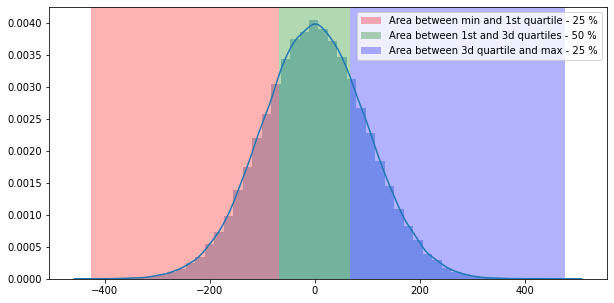

In [167]:
# квантиль 0.5, второй квартиль, 50-ый персентиль, медиана
quantile_05 = np.quantile(norm_distr, 0.5)
quartile_2 = np.median(norm_distr)
percentile_50 = np.percentile(norm_distr, 50)
print('quantile 0.5 - {}\nquartile 2 - {}\npercentile 50 - {}\nmedian - {}\n'.\
      format(quantile_05, quartile_2, percentile_50, median_))

# квантиль 0.25, первый квартиль, 25-ый персентиль
quantile_025 = np.quantile(norm_distr, 0.25)
quartile_1 = np.median(norm_distr[norm_distr<quantile_05])
percentile_25 = np.percentile(norm_distr, 25)
print('quantile 0.25 - {}\nquartile 1 - {}\npercentile 25 - {}\n'\
.format(quantile_025, quartile_1, percentile_25))

# квантиль 0.75, третий квартиль, 75-ый персентиль
quantile_075 = np.quantile(norm_distr, 0.75)
quartile_3 = np.median(norm_distr[norm_distr>quantile_05])
percentile_75 = np.percentile(norm_distr, 75)
print('quantile 0.75 - {}\nquartile 3 - {}\npercentile 75 - {}\n'\
.format(quantile_075, quartile_3, percentile_75))

# интерквартильный размах
iqr = quartile_3 - quartile_1
print('Interquantile range -', iqr)

fig = plt.figure(figsize=(10, 5))
sns.distplot(norm_distr, bins=50)
plt.axvspan(min_, quartile_1, facecolor='r', alpha=0.3,
label='Area between min and 1st quartile - 25 %')
plt.axvspan(quartile_1, quartile_3, facecolor='g', alpha=0.3,
label='Area between 1st and 3d quartiles - 50 %')
plt.axvspan(quartile_3, max_, facecolor='b', alpha=0.3,
label='Area between 3d quartile and max - 25 %')
plt.legend()
plt.show()

### 1.5. График box-plot.

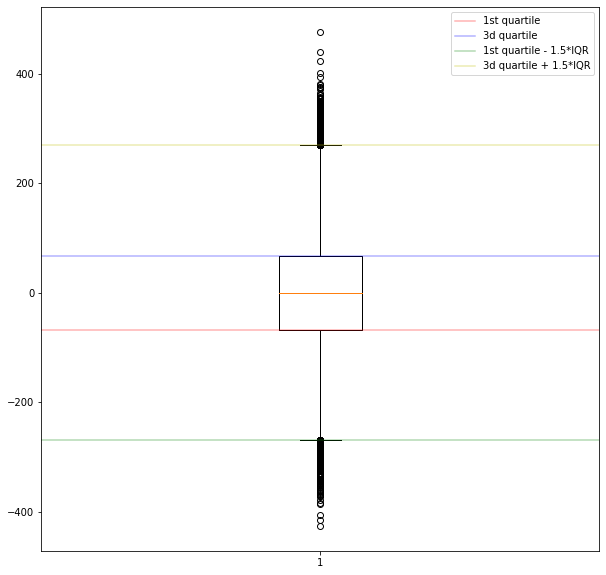

In [168]:
fig = plt.figure(figsize=(10, 10))
plt.boxplot(norm_distr)
plt.axhline(quartile_1, c='r', alpha=0.3, label='1st quartile')
plt.axhline(quartile_3, c='b', alpha=0.3, label='3d quartile')
plt.axhline(quartile_1-1.5*iqr, c='g', alpha=0.3, label='1st quartile - 1.5*IQR')
plt.axhline(quartile_3+1.5*iqr, c='y', alpha=0.3, label='3d quartile + 1.5*IQR')
plt.legend()
plt.show()

### 1.6. Нормальное распределение. Стандартизация (z-преобразование).

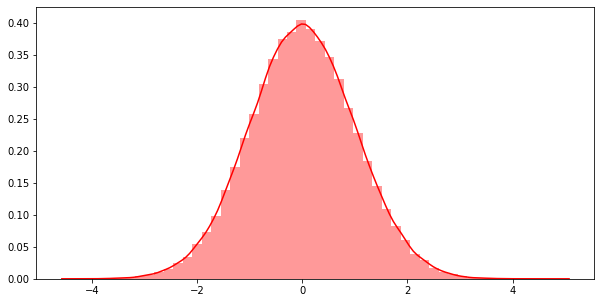

'Нам необходимо узнать какова вероятность того, что значение объекта будет больше определённого. Для этого\nнам необходимо привести это значение к стандартному: (х - mean) / sd --> смотрим по таблице соответствующее значение\nвероятности'

In [169]:
z_norm_distr = (norm_distr - mean_) / sd
fig = plt.figure(figsize=(10, 5))
sns.distplot(z_norm_distr, bins=50, color='r')
plt.show()
''' *Правило двух/трех сигм.'''
# mean +- sigma ~ 68 % наблюдений
# mean +- 2*sigma ~ 95 % наблюдений
# mean +- 3*sigma ~ 100 % наблюдений
'''Добавить спец таблицу'''
'''Нам необходимо узнать какова вероятность того, что значение объекта будет больше определённого. Для этого
нам необходимо привести это значение к стандартному: (х - mean) / sd --> смотрим по таблице соответствующее значение
вероятности'''

### Negative Z-score table
Use the negative Z score table below to find values on the left of the mean as can be seen in the graph alongside. Corresponding values which are less than the mean are marked with a negative score in the z-table and respresent the area under the bell curve to the left of z.

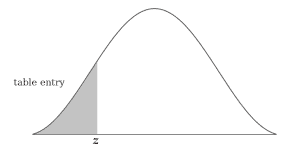

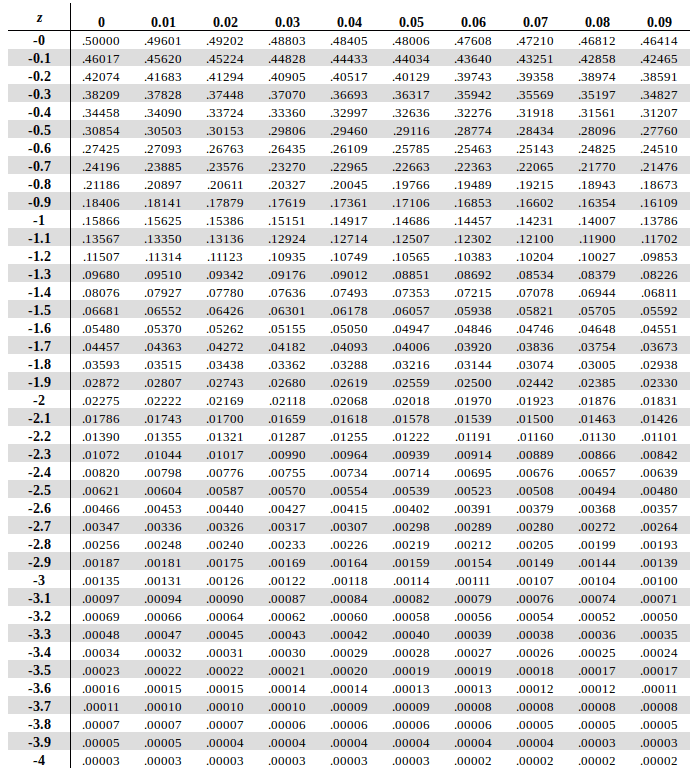

### Positive Z-score table
Use the positive Z score table below to find values on the right of the mean as can be seen in the graph alongside. Corresponding values which are greater than the mean are marked with a positive score in the z-table and respresent the area under the bell curve to the left of z.

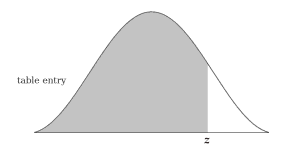

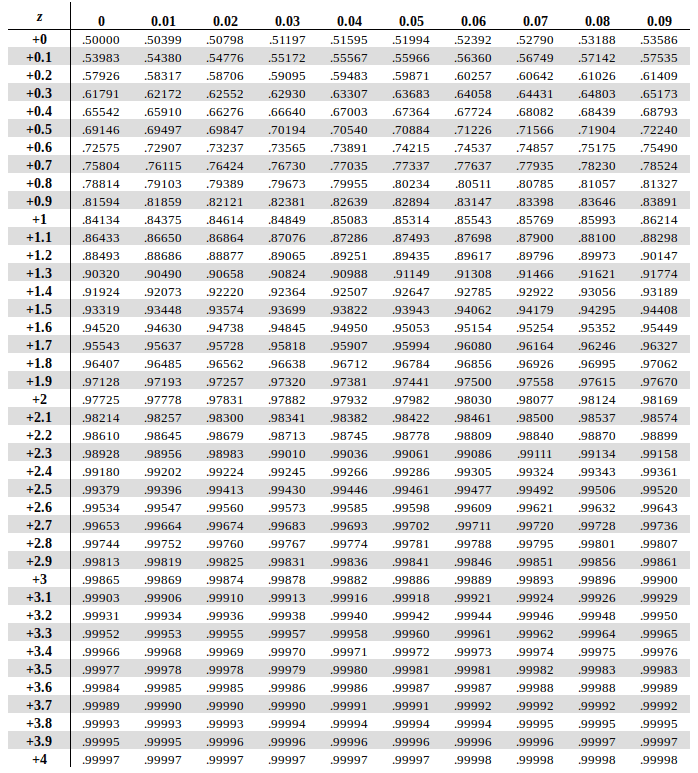

### 1.7. Центральная предельная теорема.
Практика изучения случайных явлений показывает, что хотя результаты отдельных наблюдений, даже проведенных в одинаковых условиях, могут сильно отличаться, в то же время средние результаты для достаточно большого числа наблюдений устойчивы и слабо зависят от результатов отдельных наблюдений. Теоретическим обоснованием этого замечательного свойства случайных явлений является **закон больших чисел**. Общий смысл закона больших чисел — совместное действие большого числа случайных факторов приводит к результату, почти не зависящему от случая.  
Теорема Ляпунова объясняет широкое распространение нормального закона распределения и поясняет механизм его образования. Теорема позволяет утверждать, что всегда, когда случайная величина образуется в результате сложения большого числа независимых случайных величин, дисперсии которых малы по сравнению с дисперсией суммы, закон распределения этой случайной величины оказывается практически нормальным законом. А поскольку случайные величины всегда порождаются бесконечным количеством причин и чаще всего ни одна из них не имеет дисперсии, сравнимой с дисперсией самой случайной величины, то большинство встречающихся в практике случайных величин подчинено нормальному закону распределения.  
  
**Теорема:**
*Сумма большого числа как угодно распределенных независимых случайных величин распределена асимптотически нормально, если только слагаемые вносят равномерно малый вклад в сумму.*  
  
Это значит, что чем больше независимых слагаемых в сумме, тем ближе закон ее распределения к нормальному. Вместо суммы часто рассматривают среднее арифметическое большого числа случайных величин, оно отличается от суммы только множителем (1/n) , поэтому его распределение также стремится к нормальному с ростом числа n суммируемых величин. Поскольку случайные величины, с которыми мы сталкиваемся, например, при измерениях, есть результат действия множества независимых факторов, понятно, почему измеряемые значения, как правило, распределены нормально.  
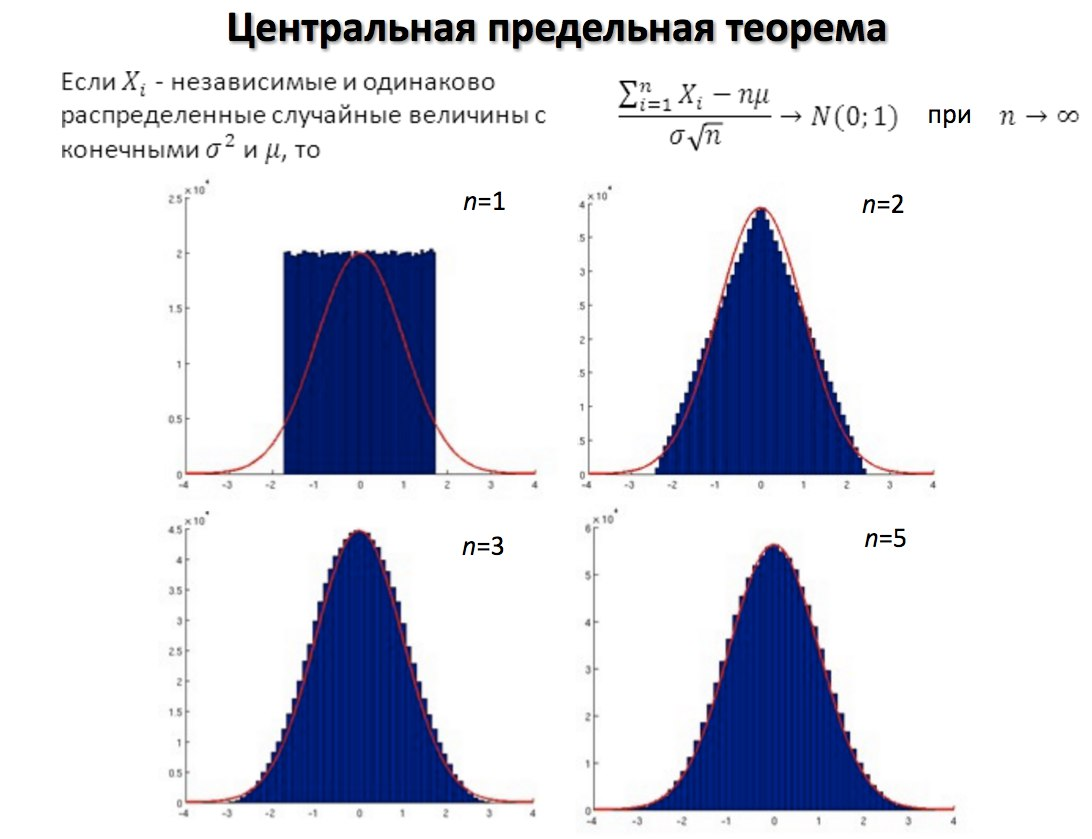
Перейдем к рассмотрению статистики относительно выборок.  

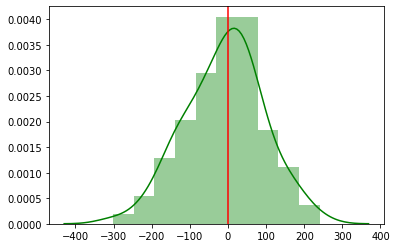

In [170]:
# кол-во объектов популяции
n_pop = 100000
# математическое ожидание (среднее) популяции
n_mean_pop = 0
# среднеквадратичное отклонение (иногда стандартное отклонение, но стандартное берет отклонения по модулю) популяции
n_sigma_pop = 1000
# синтезируем генеральную совокупность (population)
population = np.random.normal(n_mean_pop, n_sigma_pop, n_pop)

# кол-во объектов каждой выборке
n_sample = 100
# синтезируем 100 выборок (sample) из популяции
samples = [population[np.random.randint(0, n_pop, n_sample)] for i in range(100)]
# найдем среднее каждой выборки
samples_means = list(map(lambda x: x.mean(), samples))
# отобразим распределение средних значений выборок
sns.distplot(samples_means, bins=10, color='g')
# отразим среднее генеральной совокупности
plt.axvline(n_mean_pop, c='r')
plt.show()

# рассмотрим отдельно взятую выборку
sample = samples[0]
# вычислим для неё среднеквадратичное отклонение
sd_sample = np.std(sample)
# теперь можно вычислить стандартную ошибку среднего
se = sd_sample / np.sqrt(n_sample)
#  и среднее выборки
sample_mean = sample.mean()

### 1.8. Доверительные интервалы для среднего

sample_mean +- 1.96 x sigma - 95-процентный доверительный интервал  
sample_mean +- 2.58 x sigma - 99-процентный доверительный интервал

(-1909.4668084923114, 2105.847927513633)
(-1909.4299173170448, 2105.811036338366)


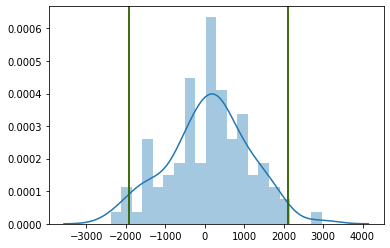

In [171]:
# построим 95-процентный доверительный интервал для данной выборки
left_95_conf = sample_mean - 1.96*sd_sample
right_95_conf = sample_mean + 1.96*sd_sample

interval = stats.norm.interval(0.95, sample_mean, scale=sd_sample)
print('({}, {})'.format(left_95_conf, right_95_conf))
print(interval)
# отобразим распределение выборки и границы доверительного интервала
sns.distplot(sample, bins=20)
plt.axvline(left_95_conf, c='r')
plt.axvline(right_95_conf, c='r')
plt.axvline(interval[0], c='g')
plt.axvline(interval[1], c='g')
plt.show()

### 1.9. Идея статистического вывода.
**Нулевая гипотеза (Н0)**: получившаяся выборка отражает генеральную совокупность.  
**Альтернативная гипотеза (Н1)**: получившаяся выборка не отражает генеральную совокупность.  
А теперь сравним **средние**. Среднее выборки и среднее генеральной совокупности. Просто интересно насколько выборка отличается от популяции.

In [172]:
delta_mean = sample_mean - n_mean
delta_mean

98.1905595106606

Очень не показательно смотреть на абсолютные величины ведь в других экспериментах могут быть совсем другие разряды чисел.  
Именно поэтому рассмотрим эту дельту в единицах стандартных ошибках среднего, то есть перейдем на стандартную шкалу.
Это ещё называется *z-преобразованием*.

In [173]:
z_delta_mean = (sample_mean - n_mean) / se
z_delta_mean

0.9585973169930353

Итак, мы просто сопоставили среднее выборки и среднее популяции (как эталонное) в проекции отклонений выборки. Чем больше они
отличаются, тем больше отличаются выборки. Причем в данном случае мы учитываем размер выборки. Чем больше выборка,
тем сложнее назвать её случайностью.
А теперь просто взглянем, где у нас окажется получившееся значение на диаграмме распределения.

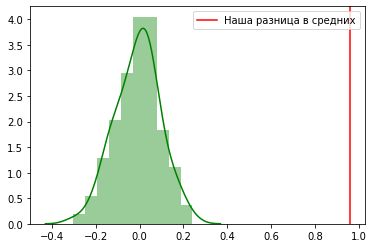

In [174]:
# нормализуем наше распределение средних выборок
z_norm_distr = (np.array(samples_means) - n_mean_pop) / n_sigma_pop
# отобразим нормализованное распределение средних значений выборок
sns.distplot(z_norm_distr, bins=10, color='g')
# покажем получившуюся разницу в выборках
plt.axvline(z_delta_mean, c='r', label='Наша разница в средних')
plt.legend()
plt.show()

Как можно заметить эта разница "убежала" слишком далеко, чтобы считаться статистически возможной.

Далее, по найденному z_delta_mean мы определим p-уровень значимости.
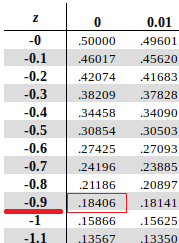

Умножаем найденное число на 2, так как мы строим симметрчный доверительный интервал.
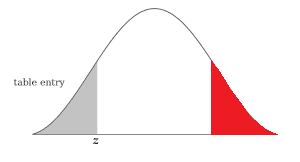
Однако в случае с *односторонним* принятем гипотезы **не надо** умножать на два!  
**p_value = 0.36812**, что в разы больше чем надо для того, чтобы не отвергать нулевую гипотезу.  
Мы просто сопоставим среднее выборки и среднее популяции (как эталонное) в проекции отклонений выборки. Чем больше они отличаются, тем больше отличаются выборки. Причем в данном случае мы учитываем размер выборки. Чем больше выборка, тем сложнее назвать её случайностью.  
Далее вычисляем **p-уровень** значимости (p-value). Если p_value < 0.05, то можно отклонить нулевую гипотезу. Если p_value > 0.05, то у нас недостаточно оснований отклонить нулевую гипотезу. Таким образом мы сможем понять процент похожести нашей выборки на популяцию и посмотрим на их похожесть.

___

**Мода**

Типы переменных: количественные и качественные (номинативные). Отдельный случай - ранговые.  

Репрезентативность выборки.  

___

## 2. Сравнение средних.
### 2.1. T-распределение.
Давайте еще раз взглянем на процесс проверки гипотезы. Пусть у нас имеется генеральная совокупность с известным средним.
К примеру мы знаем, что время выздоровления человека с применением лекарств 10 дней. Наш опыт заключался в том, чтобы
доказать, что без лекарств это переиод увеличится. Мы набрали 25 человек для проведения нашего эксперимента и получили
среднее время выздоровления 10.8 дней. Это статистически значимый результат или небольшое отклонение от общей картины?

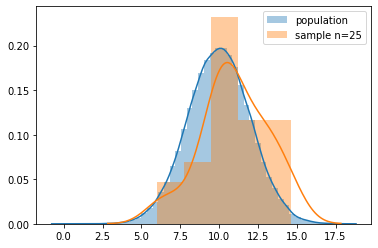

2.0000000000000018


In [175]:
# математическое ожидание (среднее)
mean_pop = 10
# среднеквадратичное отклонение (иногда стандартное отклонение, но стандартное берет отклонения по модулю)
sigma_pop = 2
# кол-во объектов
n_pop = 100000
# синтезируем генеральную совокупность (population_pop)
population_pop = np.random.normal(mean_pop, sigma_pop, n_pop)

# среднее выборки
mean_sample = 10.8
# среднеквадратичное отклонение выборки
sigma_sample = 2
# кол-во объектов выборки
n_sample = 25
# синтезируем нашу выборку (population_sample)
population_sample = np.random.normal(mean_sample, sigma_sample, n_sample)

# отобразим наши выборки
sns.distplot(population_pop, label='population')
sns.distplot(population_sample, label=f'sample n={n_sample}')
plt.legend()
plt.show()

# для проверки гипотезы вычислим стандартную ошибку среднего
se = sigma_sample / np.sqrt(n_sample)
# а теперь вычислим разницу между получившимся средним и средним популяции
delta_mean = mean_sample - mean_pop
# нормализуем эту дельту
z_delta_mean = delta_mean / se
# получим следующее значение
print(z_delta_mean)

Что примерно равно **p-value=0.0455** и мы понимаем, что экспериментальное распределение не укладывается в общую картину распределения средних, тогда мы заключаем, что 10.8 дней это не случайность, а реальное изменение картины.  
Однако в жизни мы зачастую не знаем **сигму** у популяции. Именно поэтому мы перейдем к **T-распределению Стьюдента**.
И по нему наш p-уровень значимости для 25 объектов выборки будет равен **0.0569** и мы не сможем отвергнуть нулевую гипотезу о
равенстве двух выборок, как не сможем и сказать, что отсутствие лекарств влияет на время выздоровления.

In [176]:
# так называемый t-критерий, который, на самом деле, мы уже рассчитали
t_student = (mean_sample-mean_pop) / (sigma_sample/np.sqrt(n_sample))
print(t_student)
# библиотечная возможность вычисления p-уровня значимости
from scipy import stats
print('p-value = ', (2*(1 - stats.t.cdf(t_student, df=24))))

2.0000000000000018
p-value =  0.0569398499365914


На самом деле в случае с большим кол-вом объектов в нашей выборке (**30+**) получение значения критерия Стьюдента больше **2**
будет означать **отклонение** гипотезы, а в случае с меньшим будет означать невозможность отклонения. В этом и есть смысл так
называемых *степеней свободы (df)*, которые вычисляются исходя из размера выборки (df=n-1). Чем меньше размер выборки, тем
выше её вариабельность относительно реальных показателей, и это нужно учитывать. И это учитывается - чем меньше выборка, тем
более вариативное строится распределение Стьюдента, тем сильнее должны отличаться средние выборки и популяции, чтобы
претендовать на **статистическую значимость**. Проще говоря, чем меньше выборка, тем вероятнее, что она случайна.

### 2.2. Сравнение двух средних.
Для сравнения двух выборок используется *попарный t-test*. Рассмотрим две выборки. Нулевая гипотеза гласит о том, что эти
две выборки одинаковы и являются представителями одной генеральной совокупности. Альтернативная говорит об обратном.

In [177]:
# среднее первой выборки
mean_sample_1 = 10.8
# среднеквадратичное отклонение первой выборки
sigma_sample_1 = 2
# кол-во объектов первой выборки
n_sample_1 = 10
# синтезируем первую выборку
sample_1 = np.random.normal(mean_sample_1, sigma_sample_1, n_sample_1)

# среднее второй выборки
mean_sample_2 = 10
# среднеквадратичное отклонение второй выборки
sigma_sample_2 = 1
# кол-во объектов второй выборки
n_sample_2 = 15
# синтезируем вторую выборку
sample_2 = np.random.normal(mean_sample_2, sigma_sample_2, n_sample_2)

# стандарнтая ошибка распределения разностей средних двух выборок
se = np.sqrt((sigma_sample_1**2)/n_sample_1 + (sigma_sample_2**2)/n_sample_2)
# степени свободы для такого распределения
df = n_sample_1 + n_sample_2 - 2
# t-значение для этих двух выборок
t_student = (mean_sample_1 - mean_sample_2) / se

Далее, зная *t-критерий* и *степень свободы* распределения можем вычислить *p-уровень* значимости и принять либо отвергнуть
нулевую гипотезу.

In [178]:
print('p-value =', (2*(1 - stats.t.cdf(t_student, df=df))))

p-value = 0.25355675967039937


Итак, на основании значения p-value мы принимаем гипотезу о том, что две эти выборки принадлежат одной совокупности.
Интересно будет заметить, что если этих же показателей (среднее и СКО) добиться на большем кол-ве объектов в этих двух
выборках, то такие выборки уже не будут принадлежать одной популяции, а следовательно не равны между собой.

In [179]:
n_sample_1 = 100
n_sample_2 = 150
se = np.sqrt((sigma_sample_1**2)/n_sample_1 + (sigma_sample_2**2)/n_sample_2)
df = n_sample_1 + n_sample_2 - 2
t_student = (mean_sample_1 - mean_sample_2) / se
p_value = 2*(1 - stats.t.cdf(t_student, df=df))
print('Для увеличенного кол-ва объектов выборок p-value =', p_value)

Для увеличенного кол-ва объектов выборок p-value = 0.0002623453922474539


### 2.3. Проверка распределения на нормальность, QQ-plot.

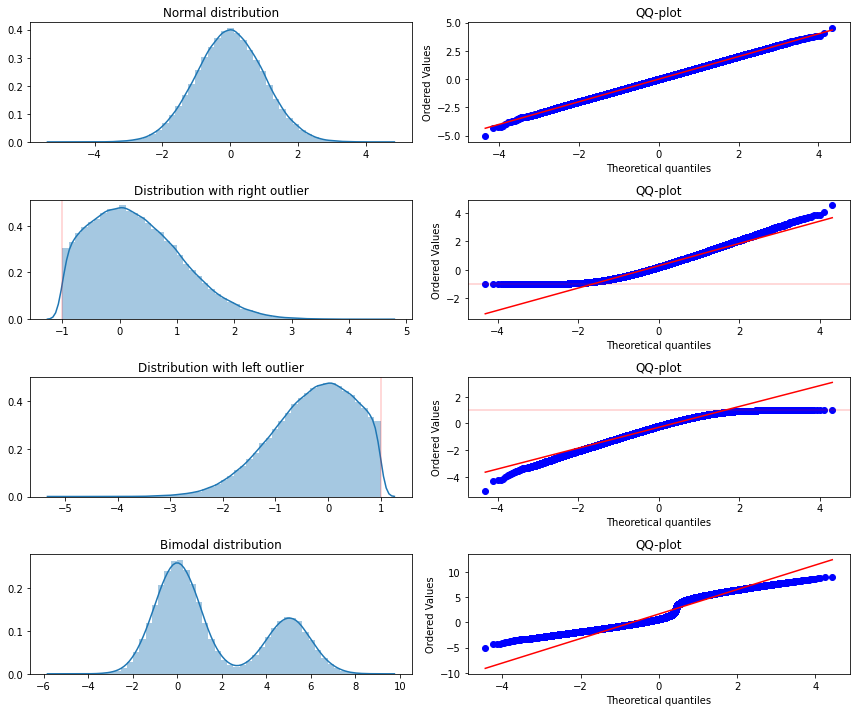

In [180]:
import scipy.stats as stats


# сформируем новую популяцию
sample_1 = np.random.normal(0, 1, 100000)
# бимодальная популяция
sample_2 = np.random.normal(5, 1, 50000)
sample = np.concatenate((sample_1, sample_2))

fig, axes = plt.subplots(4, 2, figsize=(12,10))
# посмотрим на её распределение
sns.distplot(sample_1, ax=axes[0, 0])
axes[0, 0].set_title('Normal distribution')
# теперь построим qq-plot
stats.probplot(sample_1, dist='norm', plot=axes[0, 1])
axes[0, 1].set_title('QQ-plot')

# визуализируем
sns.distplot(sample_1[sample_1>-1], ax=axes[1, 0])
axes[1, 0].set_title('Distribution with right outlier')
axes[1, 0].axvline(-1, c='r', alpha=0.2)
stats.probplot(sample_1[sample_1>-1], dist='norm', plot=axes[1, 1])
axes[1, 1].axhline(-1, c='r', alpha=0.2)
axes[1, 1].set_title('QQ-plot')

sns.distplot(sample_1[sample_1<1], ax=axes[2, 0])
axes[2, 0].set_title('Distribution with left outlier')
axes[2, 0].axvline(1, c='r', alpha=0.2)
stats.probplot(sample_1[sample_1<1], dist='norm', plot=axes[2, 1])
axes[2, 1].axhline(1, c='r', alpha=0.2)
axes[2, 1].set_title('QQ-plot')

sns.distplot(sample, ax=axes[3, 0])
axes[3, 0].set_title('Bimodal distribution')
stats.probplot(sample, dist='norm', plot=axes[3, 1])
axes[3, 1].set_title('QQ-plot')

plt.tight_layout()
plt.show()

А что делать если у нас завелись выбросы? Посмотрим как они могут повлиять на картину. Для начала посмотрим идеальную
картину.

In [181]:
mean_pop, sigma_pop, n_pop = 0, 1, 100000
# генерируем популяцию
population = np.random.normal(mean_pop, sigma_pop, n_pop)
# возьмем из неё небольшую выборку
n_sample = 100
sample = population[np.random.randint(0, n_pop, n_sample)]
# проверим нулевую гипотезу о принадлежности нашей выборки популяции
def t_test(population, sample):
    # среднее популяции
    mean_pop = np.mean(population)
    # размер выборки
    n_sample = len(sample)
    # среднее выборки
    mean_sample = np.mean(sample)
    # СКО выборки
    sigma_sample = np.std(sample)
    # стандартная ошибка среднего
    se = sigma_sample / np.sqrt(n_sample)
    # t-критерий Стьюдента
    t_student = (mean_sample-mean_pop) / (sigma_sample/np.sqrt(n_sample))
    # p-уровень значимости
    p_value = 2*(1 - stats.t.cdf(t_student, df=n_sample-1))
    return p_value

t_test(population, sample)

1.2773631845521032

Чтд. Основную гипотезу мы отвергнуть не можем, и не надо. А теперь добавим немного выбросов и посмотрим как себя поведет
t-test.

In [182]:
for i in range(0, 4):
    sample[i] = np.random.randint(50, 100, 1)
t_test(population, sample)

0.04818869655588687

Всего 4 % выбросов и мы принимаем альтернативную гипотезу говорящую о том, что эта выборка не принадлежит генеральной
совокупности. Вот такой эффект оказывают выбросы. В таких ситуациях необходимо использовать *Mann-Whitney U-test*. Такой
критерий гораздо менее чувствительный к выбросам, потому что преобразует все переменные в ранговые.

In [183]:
import scipy as sp


sp.stats.mannwhitneyu(population, sample)[1]

0.31262176785322976

Так гораздо лучше.

### 2.4. Однофакторный дисперсионный анализ.
Очень часто в экспериментах и исследованиях возникает необходимость сравнить несколько групп между собой. В таком случае мы можем применять однофакторный дисперсионный анализ.  Та переменная, которая будет разделять наших испытуемых или наблюдения на группы (номинативная переменная с нескольким градациями) называется *независимой переменной*. А та количественная переменная, по степени выраженности которой мы сравниваем группы, называется *зависимая переменная*. 

In [195]:
# синтезируем первую тройку выборок, не принадлежащую одной ген. совокупности
mean_sample_1 = 10
sigma_sample_1 = 1
n_sample_1 = 30
sample_1 = np.random.normal(mean_sample_1, sigma_sample_1, n_sample_1)

mean_sample_2 = 15
sigma_sample_2 = 1.5
n_sample_2 = 30
sample_2 = np.random.normal(mean_sample_2, sigma_sample_2, n_sample_2)

mean_sample_3 = 20
sigma_sample_3 = 2
n_sample_3 = 30
sample_3 = np.random.normal(mean_sample_3, sigma_sample_3, n_sample_3)

Нулевая гипотеза будет гласить, что все они принадлежат одной популяции (mean_sample_1 = mean_sample_2 = mean_sample_3), а
альтернативная - хотя бы одно среднее отличается. Начнем с проверки основной гипотезы. Если мы считаем, что их средние
равняются, то можно высчитать их общее среднее.

In [196]:
mean_samples_1 = np.mean(np.concatenate([sample_1, sample_2, sample_3]))

Переход к общему среднему поможет нам перейти к дисперсионному анализу, который начинается с *SST (total sum of square)*. Этот
параметр характеризует насколько высока изменчивость данных **без учета разделения их на группы**, то есть общая изменчивость общей выборки.  
SST может проистекать из *SSW (sum of square within groups)* (дисперсия внутри каждой группы) и *SSB (sum of square between groups) (межгрупповая дисперсия)*.

In [197]:
samples = [sample_1, sample_2, sample_3]
samples_means = [mean_sample_1, mean_sample_2, mean_sample_3]
# SST
sst = sum([sum((group - mean_samples_1)**2) for group in samples])
# степени свободы при SST
sst_df = sum([len(group) for group in samples]) - 1
# SSW
ssw = sum([sum((group - group_mean)**2) for group, group_mean in zip(samples, samples_means)])
# степени свободы при SSW
ssw_df = sum([len(group) for group in samples]) - len(samples)
# SSB
ssb = sum([len(group)*(group_mean-mean_samples_1)**2 for group, group_mean in zip(samples, samples_means)])
# степени свободы при SSB
ssb_df = len(samples) - 1

Итак, как можно заметить, SST будто состоит из SSW и SSB. Это и правда так. Поэтому судить об изменчивости всех трех
групп (SST) можно по SSW и SSB. Какой показатель больше, тот и будет говорить о природе изменчивости всех трех групп (SST).
Ну а теперь рассчитаем основной статистический показатель дисперсионного анализа, т. н. F-значение.

In [198]:
f_measure = (ssb/ssb_df) / (ssw/ssw_df)

Как можно заметить в числителе дроби стоит межгрупповая изменчивость, и в случае нулевой гипотезы (равенства всех средних)
она должна стремиться к нулю ведь все выборки выбраны из одной популяции; и наоборот, если выборки сделаны из разных популяций,
то F-значение будет стремиться к бесконечности.
Для интерпретации получившегося значения мы высчитаем p-уровень значимости, но уже по f-распределению.

In [199]:
p_value = stats.f.cdf(f_measure, ssb_df, ssw_df)
print(p_value)

0.9999999999999999


А теперь посмотрим, что скажет анализ на выборки из одной популяции.

In [200]:
# оформим наш анализ в функцию
def one_way_ANOVA(samples:list):
    mean_samples = np.mean(np.concatenate(samples))
    samples_means = [np.mean(sample) for sample in samples]
    # SST
    sst = sum([sum((sample - mean_samples)**2) for sample in samples])
    # степени свободы при SST
    sst_df = sum([len(sample) for sample in samples]) - 1
    # SSW
    ssw = sum([sum((sample - sample_mean)**2) for sample, sample_mean in zip(samples, samples_means)])
    # степени свободы при SSW
    ssw_df = sum([len(sample) for sample in samples]) - len(samples)
    # SSB
    ssb = sum([len(sample)*(sample_mean-mean_samples)**2 for sample, sample_mean in zip(samples, samples_means)])
    # степени свободы при SSB
    ssb_df = len(samples) - 1
    # F-значение
    f_measure = (ssb/ssb_df) / (ssw/ssw_df)
    # вероятность правильности нулевой гипотезы (не путать с p-value)
    p = 1-stats.f.cdf(f_measure, ssb_df, ssw_df)
    return p

print('Вероятность того, что выборки принадлежат одной генеральной совокупности -', one_way_ANOVA(samples))
# а теперь синтезируем три выборки из одной популяции
population = np.random.normal(0, 1, 100000)
same_samples = [population[np.random.randint(0, 100000, 100)] for _ in range(2)]
print('Вероятность того, что выборки принадлежат одной генеральной совокупности -', one_way_ANOVA(same_samples))

Вероятность того, что выборки принадлежат одной генеральной совокупности - 1.1102230246251565e-16
Вероятность того, что выборки принадлежат одной генеральной совокупности - 0.6279472238346586


Ну, собственно, результат на лицо, вероятность подтверждения нулевой гипотезы возрастает в разы.

### 2.5. Множественные сравнения ANOVA.
Посмотрим ошибку t-тестa на большом кол-ве выборок.

In [202]:
yes, no = 0, 0
for _ in range(1000):
    sample = population[np.random.randint(0, 100000, 100)]
    if t_test(population, sample) < 0.05:
        yes += 1
    else:
        no += 1
print(yes)
print(no)

30
970


Как можно заметить бывают случаи, когда t-test ошибается. Но это не так страшно, ведь в процентном соотношении всё
остаётся неизменным. Другая ситуация обстоит с дисперсионным анализом, а конкретно с кол-вом сравниваемых групп. Давайте
взглянем как поведет себя ANOVA на большом кол-ве групп.

In [203]:
yes, no = 0, 0
for i in range(1000):
    samples_ = [population[np.random.randint(0, 100000, 20)] for _ in range(2000)]
    if one_way_ANOVA(samples_) < 0.05:
        yes += 1
    else:
        no += 1
print(yes)
print(no)

60
940


***Так. Здесь должно показательное увеличение yes, но что-то пошло не так. Стоит проверить подсчет p-value на датасете из
2.5.***  
В случае большого кол-ва выборок неминуемо, что одна из них будет портить всю картину. Поэтому стоит уменьшать порог 0.05,
чтобы не все наборы выборок могли претендовать на статистически различные. Для этого существует поправка Бонферони.
Высчитывается она просто:  
*кол-во выборок в сравнении* * *(кол-во выборок в сравнении - 1)* / 2.